In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot,plot
import scipy 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("Credit_Card_Applications.csv")
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [4]:
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [5]:
df[df.duplicated()]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class


In [6]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [7]:
df.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=690, step=1)

In [9]:
df.dtypes

CustomerID      int64
A1              int64
A2            float64
A3            float64
A4              int64
A5              int64
A6              int64
A7            float64
A8              int64
A9              int64
A10             int64
A11             int64
A12             int64
A13             int64
A14             int64
Class           int64
dtype: object

In [11]:
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [22]:
cat = []
for c in df.columns:
    if df[c].nunique() < 5:
        cat.append(c)

num = list(set(df.columns).difference(set(cat)))

In [23]:
num

['A7', 'A3', 'A14', 'A10', 'CustomerID', 'A6', 'A13', 'A2', 'A5']

In [24]:
len(cat)

7

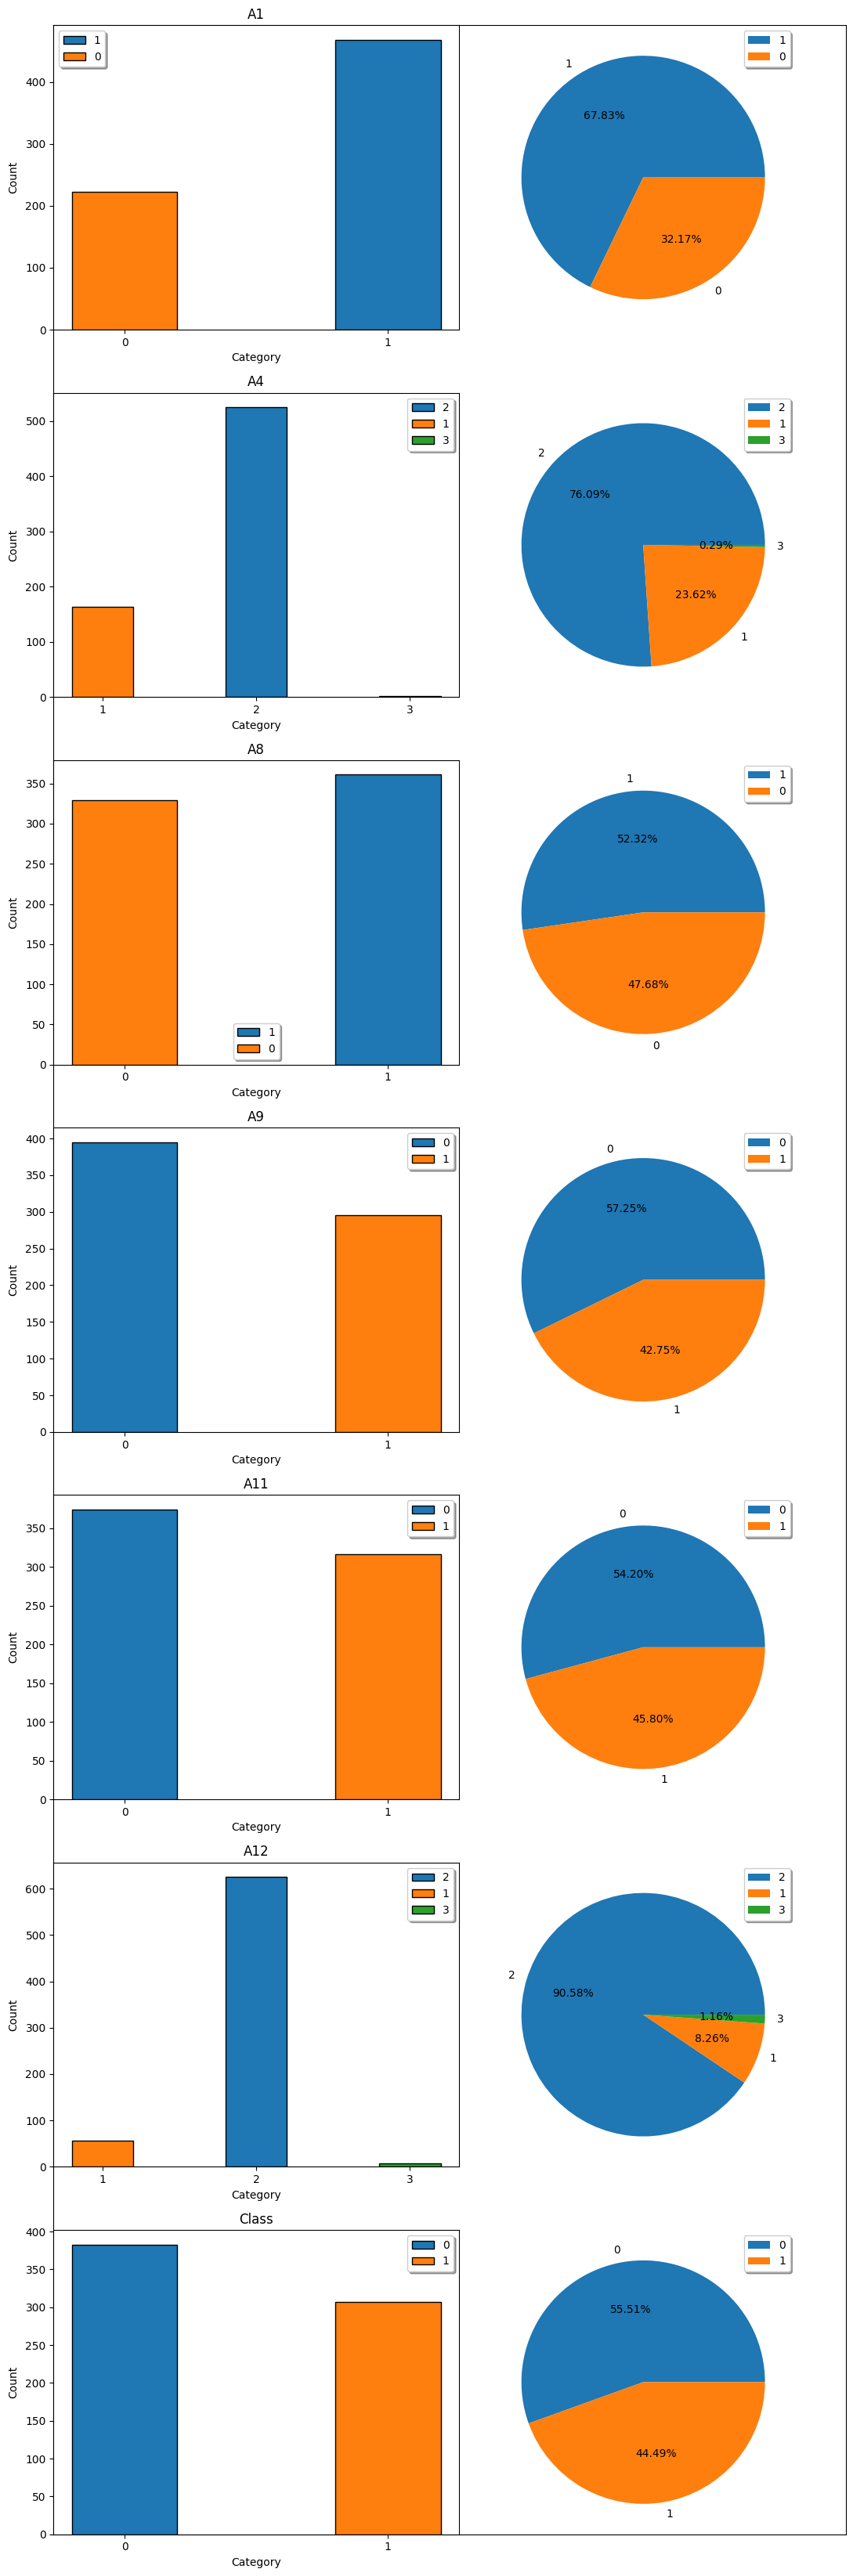

In [44]:
plt.figure(figsize=(11,33))
plt.subplot()
plt.xticks([])
plt.yticks([])
k = 1
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i in range(1,len(cat)+1):
    plt.subplot(7,2,k)
    plt.bar(df[cat[i-1]].value_counts().index,height=df[cat[i-1]].value_counts().values,width=0.4,edgecolor='black',label=df[cat[i-1]].value_counts().index,color=colors[:df[cat[i-1]].value_counts().shape[0]])
    plt.title(cat[i-1])
    plt.xticks(df[cat[i-1]].value_counts().index)
    plt.xlabel("Category")
    plt.ylabel("Count",labelpad=6)
    plt.legend(shadow=True)
    k += 1 
    plt.subplot(7,2,k)
    plt.pie(df[cat[i-1]].value_counts().values,labels=df[cat[i-1]].value_counts().index,autopct="%.2f%%")
    plt.legend(shadow=True)
    k += 1

plt.tight_layout()
plt.show()

In [46]:
num.remove("CustomerID")

In [47]:
num

['A7', 'A3', 'A14', 'A10', 'A6', 'A13', 'A2', 'A5']

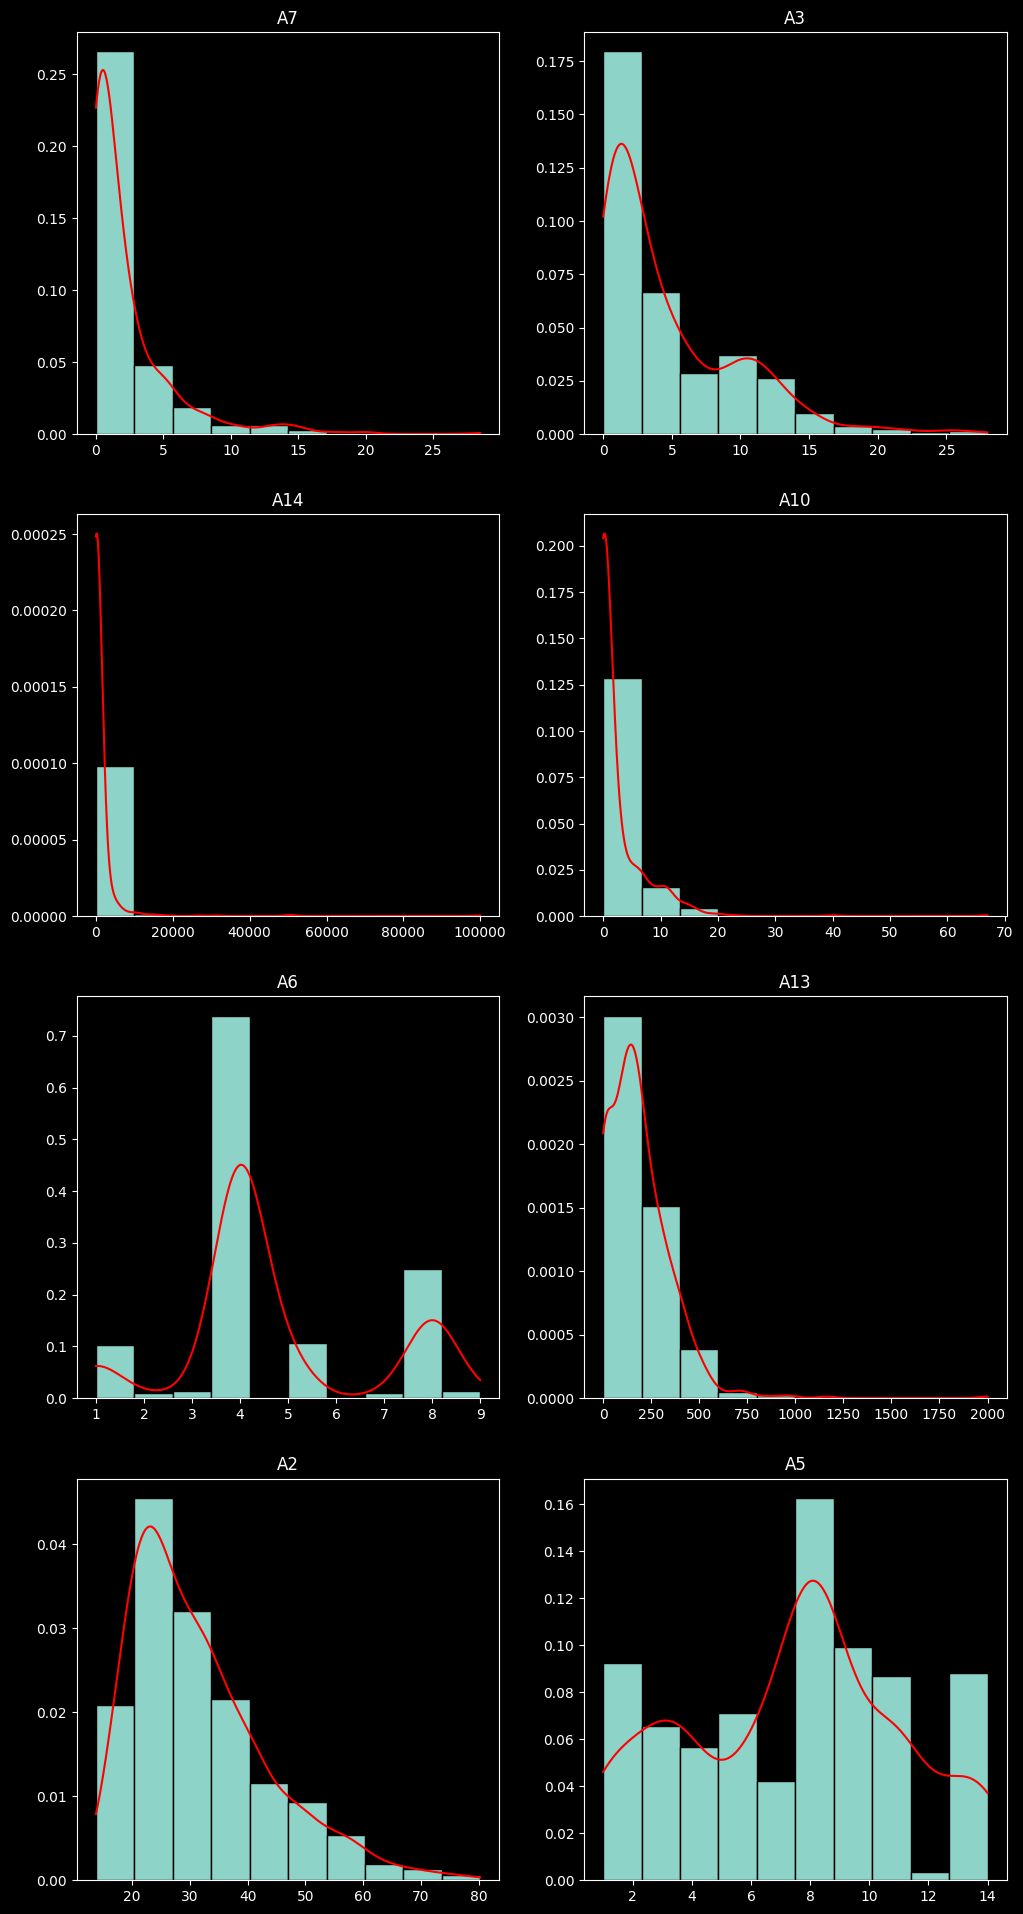

In [64]:
with plt.style.context("dark_background"):
    f,ax = plt.subplots(4,2,figsize=(12,24))
    k = 0
    for i in range(4):
        for j in range(2):
            kde = scipy.stats.gaussian_kde(df[num[k]])
            x = np.linspace(df[num[k]].min(),df[num[k]].max(),690)
            y = kde(x)
            ax[i,j].set_title(num[k])
            ax[i,j].hist(df[num[k]],edgecolor='black',density=True)
            ax[i,j].plot(x,y,color='red')
            k += 1

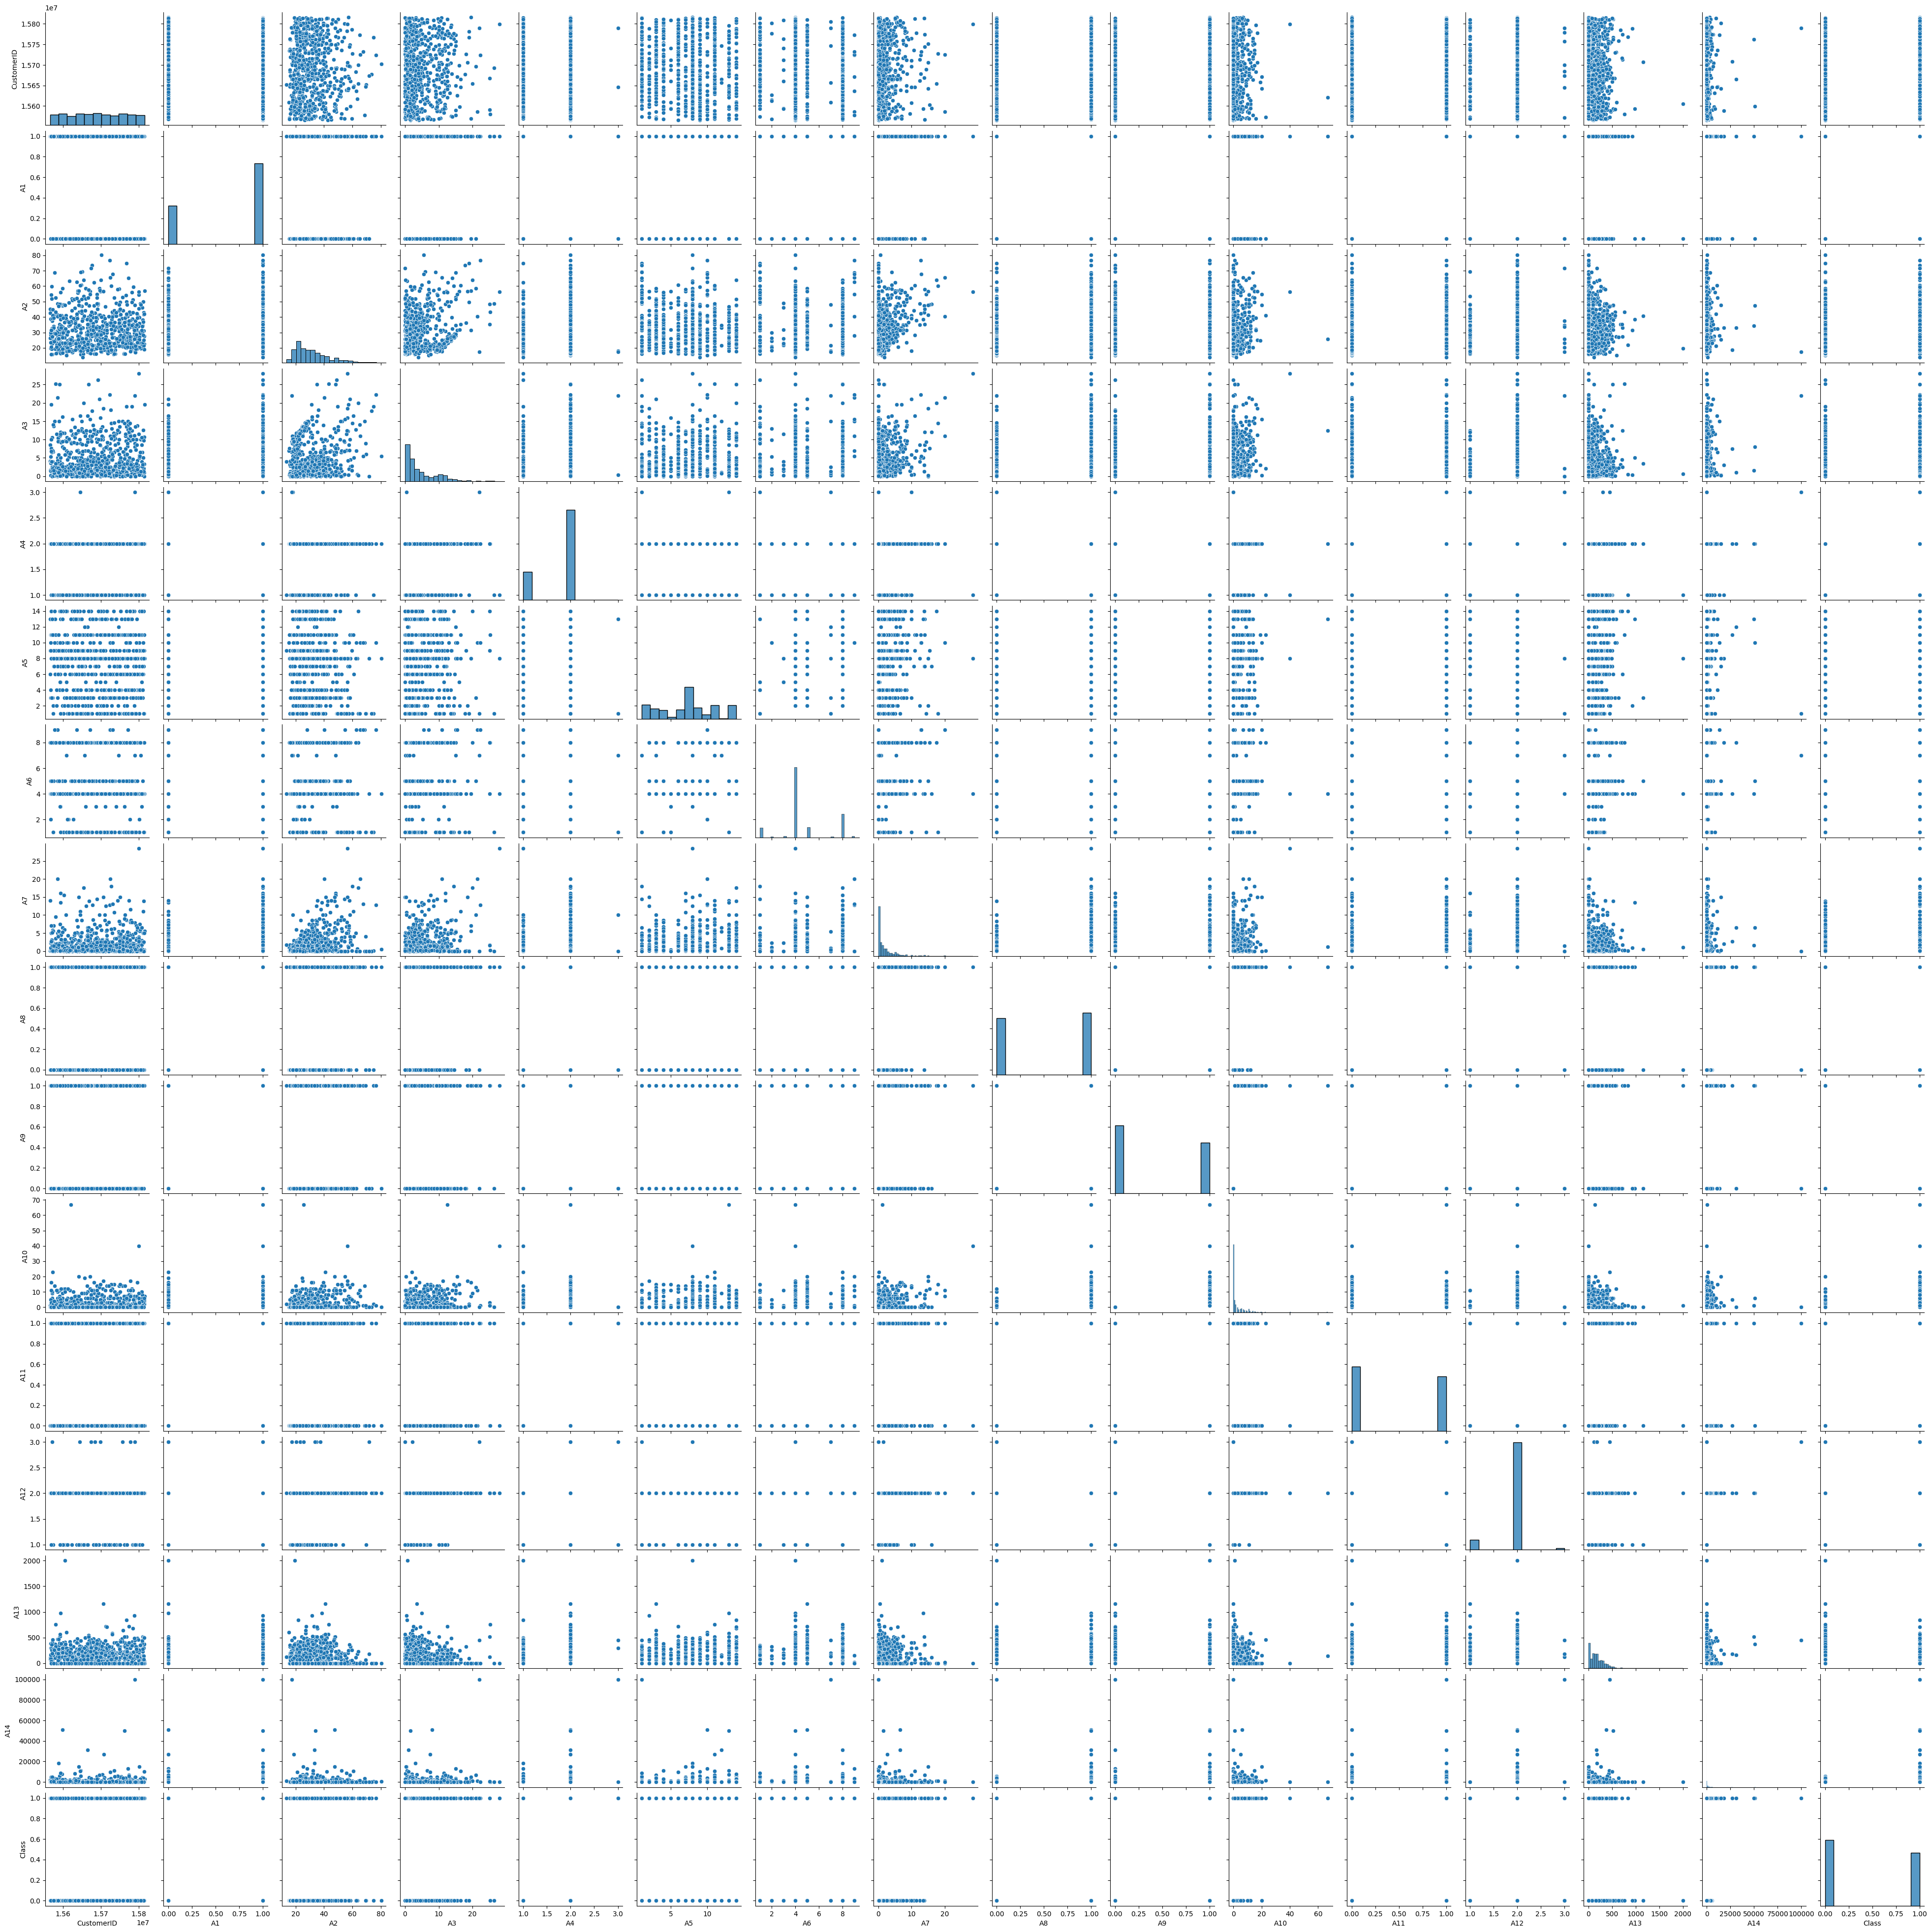

In [65]:
sns.pairplot(df)

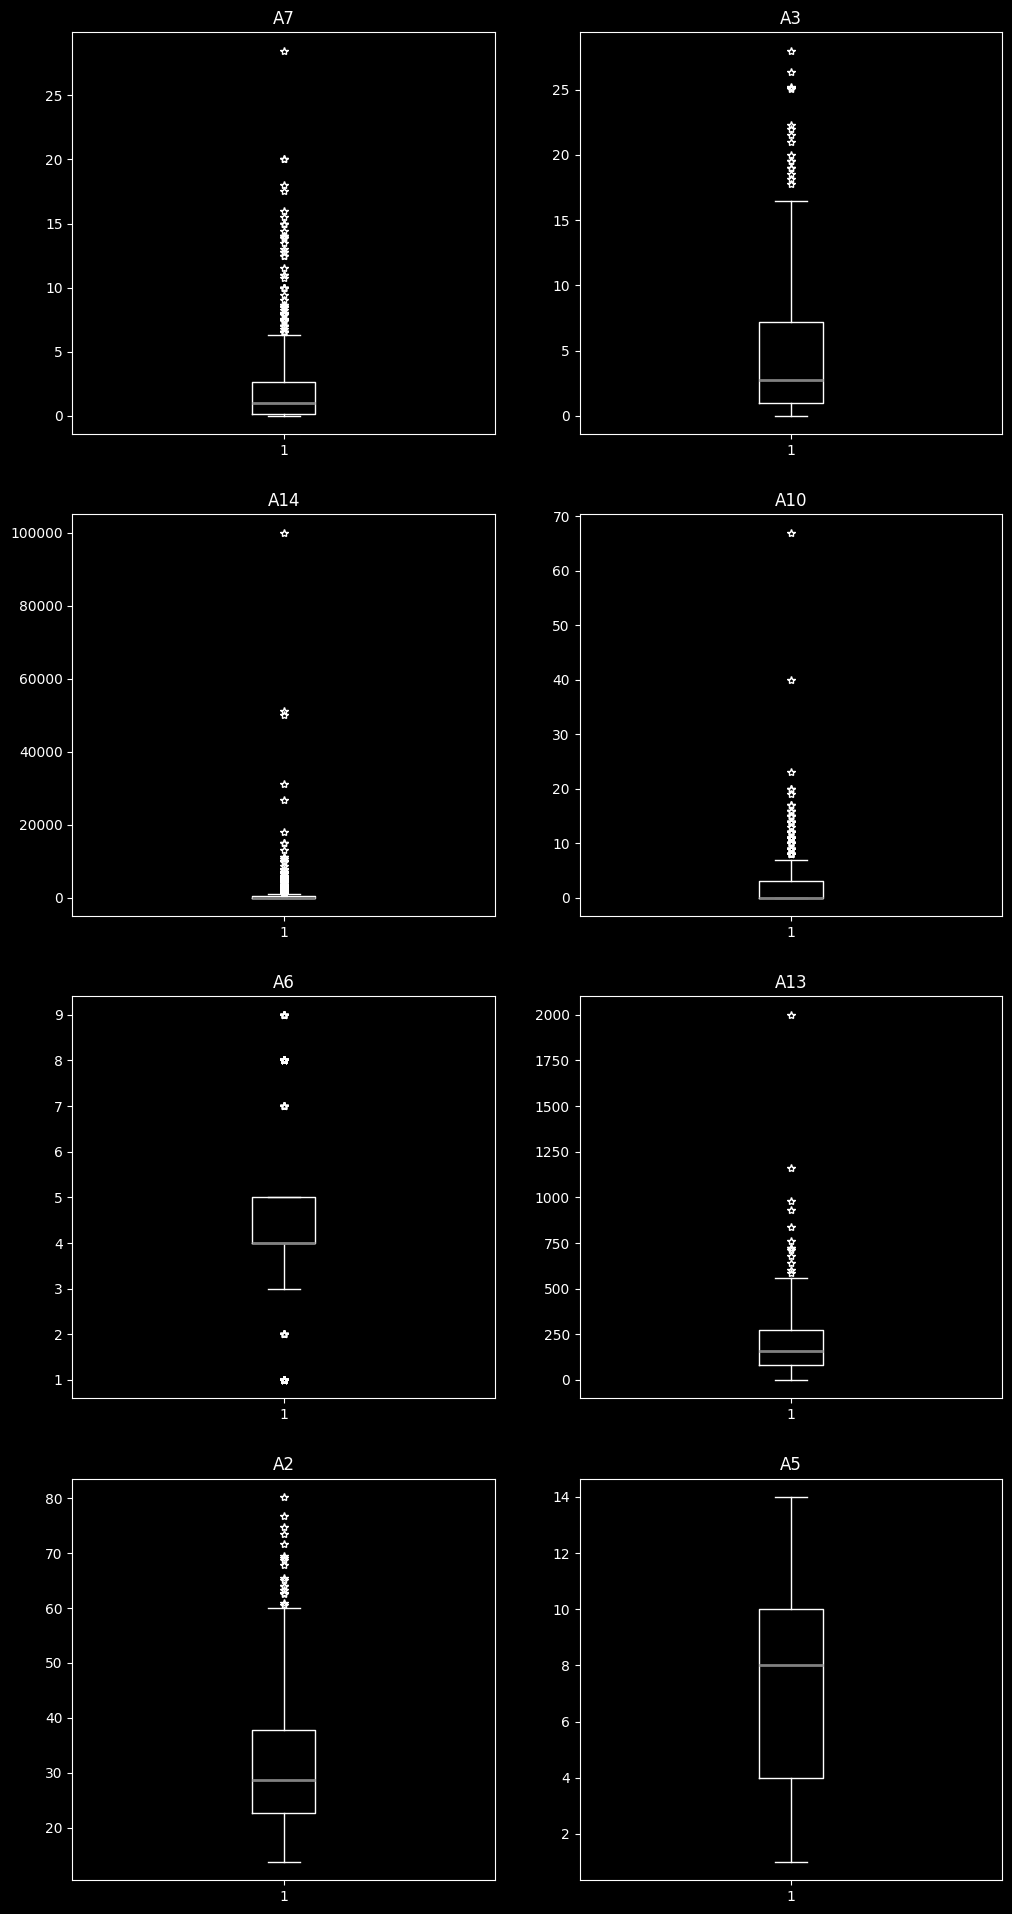

In [68]:
with plt.style.context("dark_background"):
    f,ax = plt.subplots(4,2,figsize=(12,24))
    k = 0
    for i in range(4):
        for j in range(2):
            ax[i,j].set_title(num[k])
            ax[i,j].boxplot(df[num[k]],sym='*',medianprops={"linewidth":2,"color":"grey"})
            k += 1

In [75]:
(len(num) -1)* (len(num) - 2) / 2

21.0

In [84]:
num

['A7', 'A3', 'A14', 'A10', 'A6', 'A13', 'A2', 'A5']

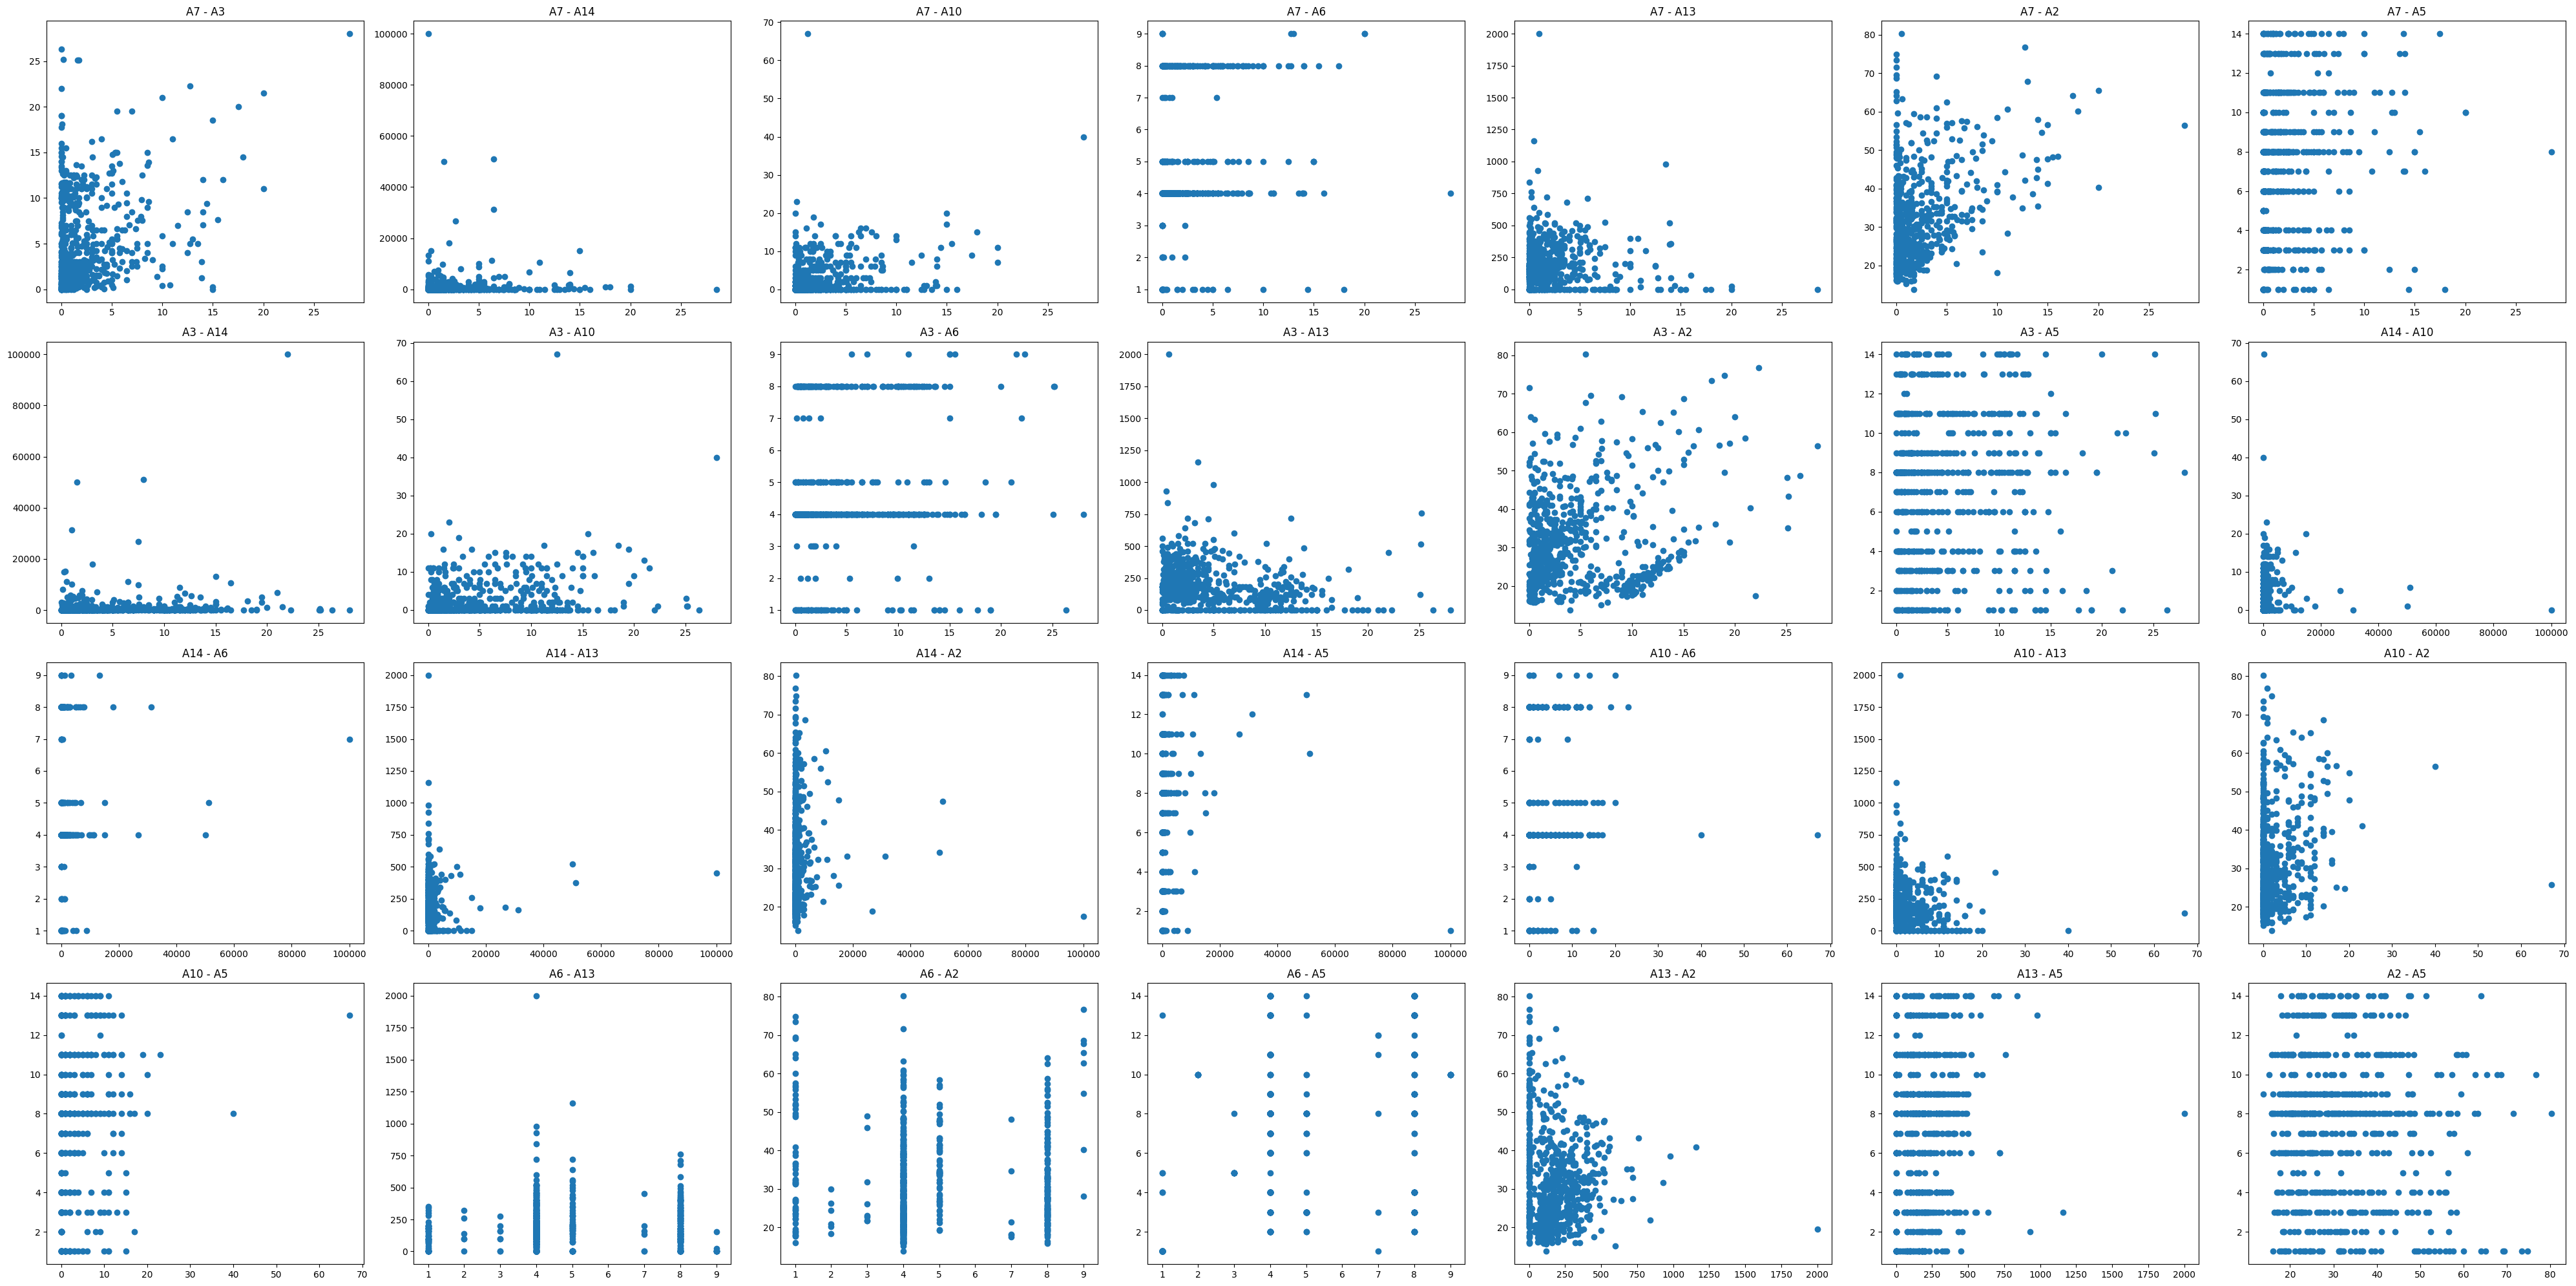

In [87]:
plt.figure(figsize=(40,20))
k = 1
for x in range(len(num)):
    if x + 1 == 8:
        break
    for y in num[x+1:]:
        plt.subplot(4,7,k)
        plt.scatter(df[num[x]],df[y])
        plt.title(f"{num[x]} - {y}")
        k += 1

plt.tight_layout()
plt.show()

**positively correlated**
- A7 & A3
- A7 & A10
- A7 & A13
- A7 & A2
- A3 & A13
- A3 & A2
- A10 & A13  

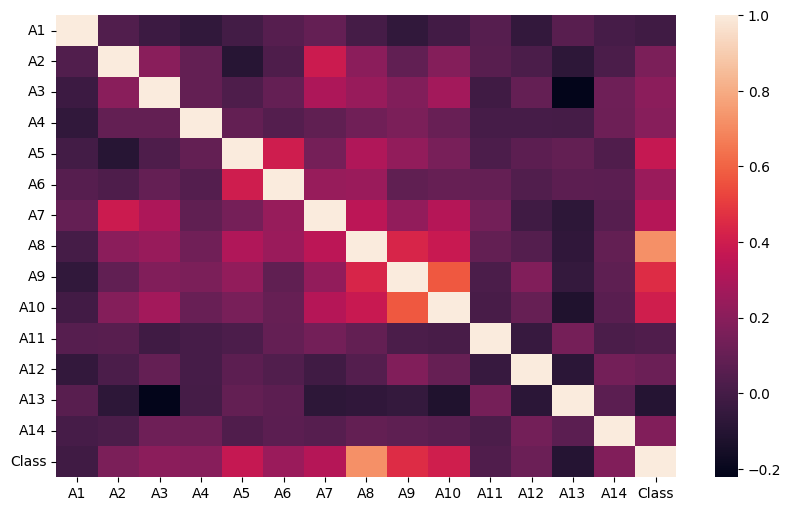

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop("CustomerID",axis=1).corr())
plt.show()

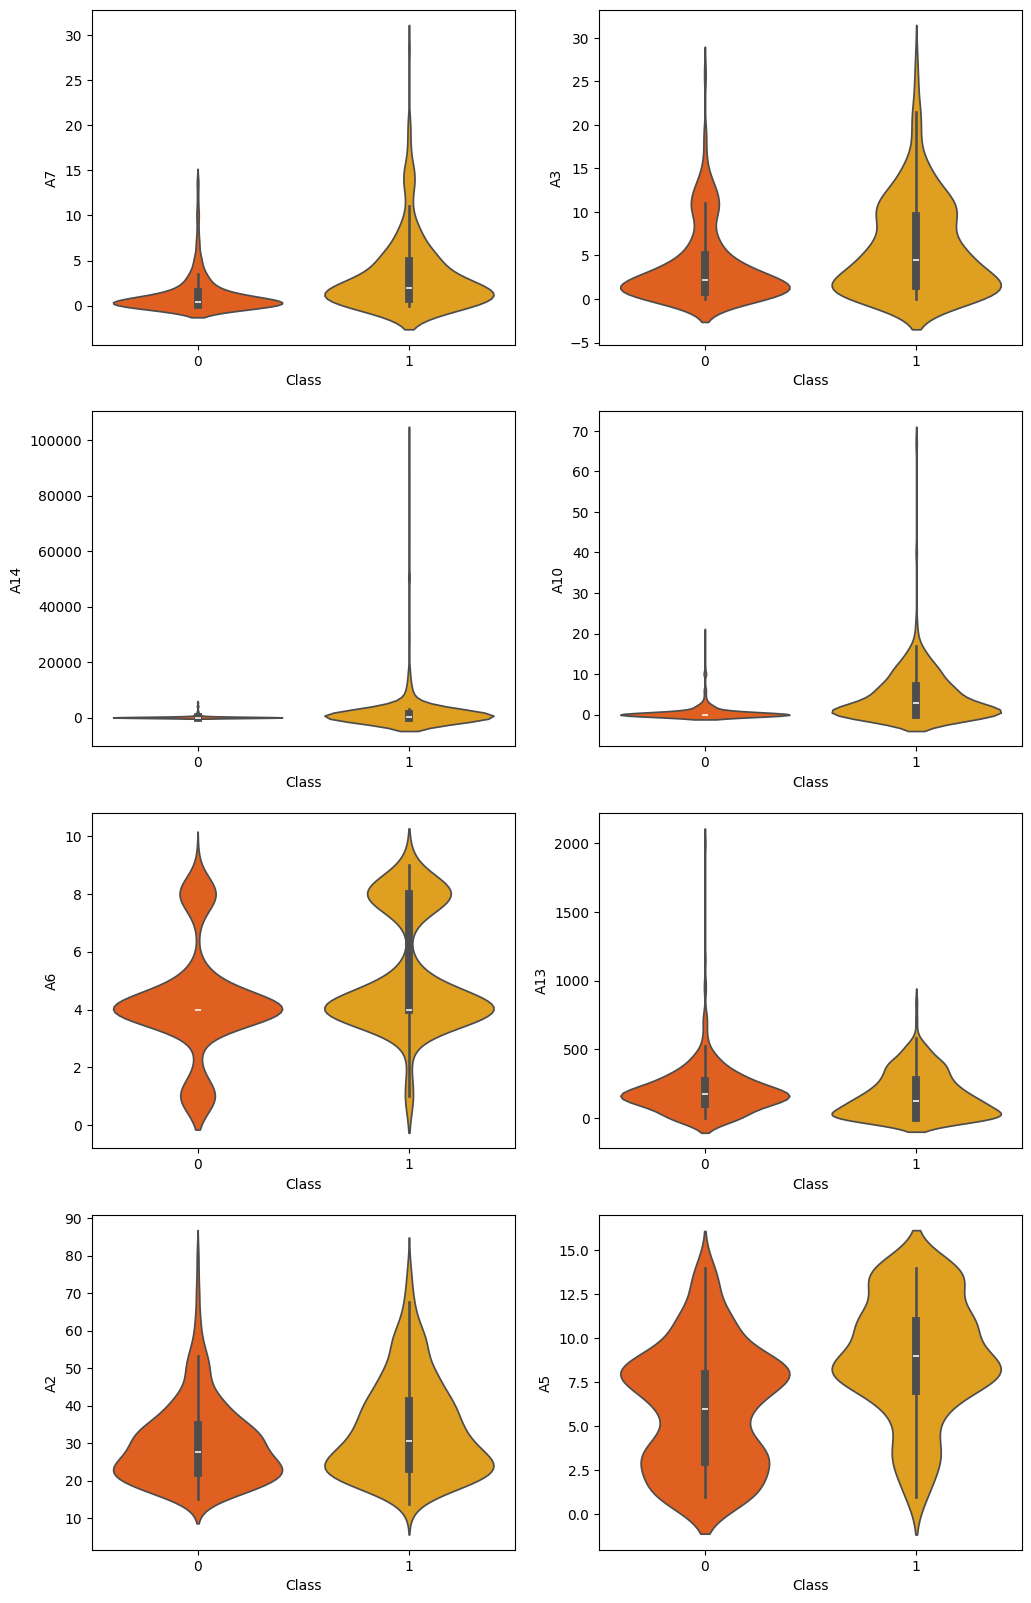

In [98]:
f,ax = plt.subplots(4,2,figsize=(12,20))
k = 0
for i in range(4):
    for j in range(2):
        sns.violinplot(data=df,x='Class',y=num[k],palette='autumn',ax=ax[i,j])
        k += 1

<Axes: xlabel='A11', ylabel='A10'>

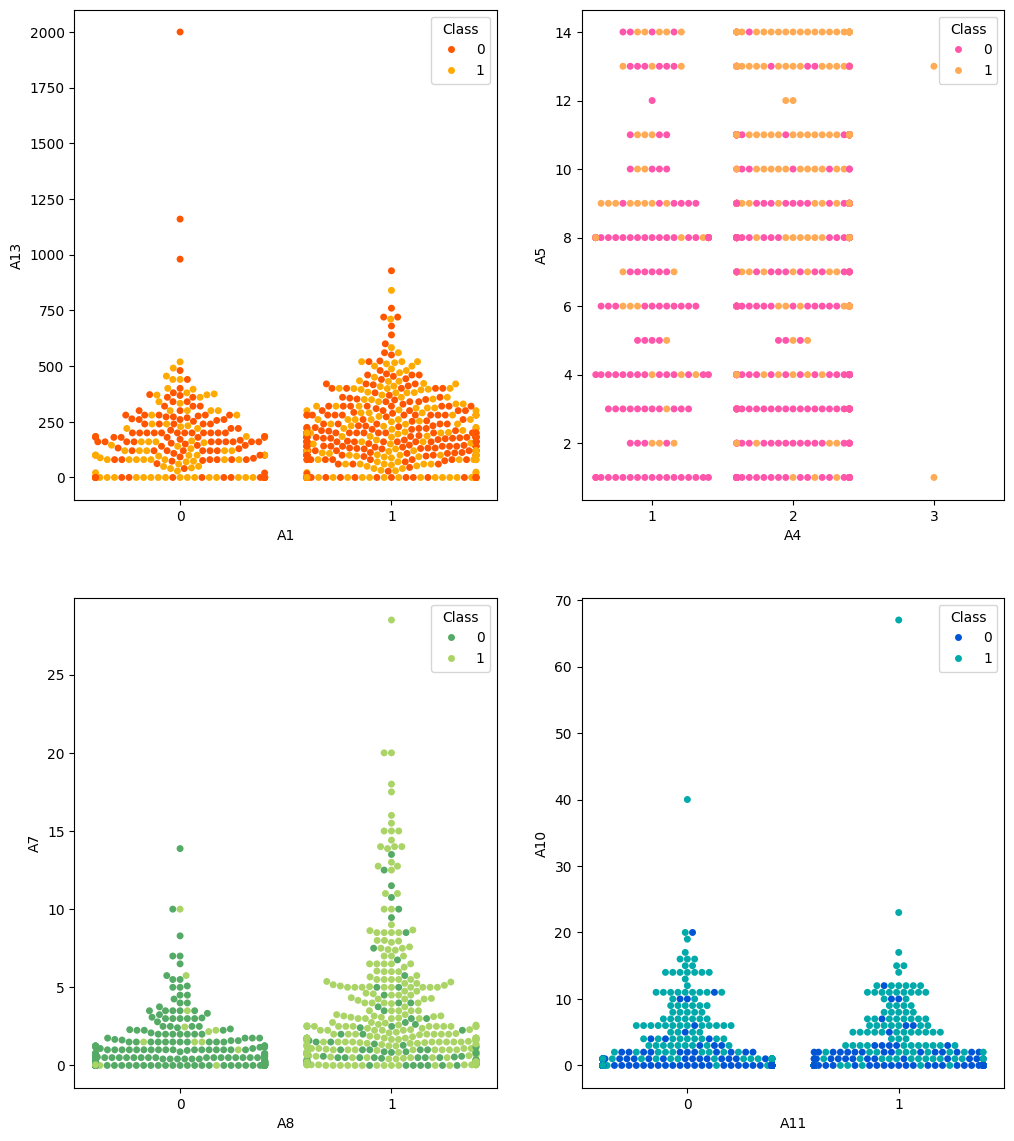

In [109]:
f,ax = plt.subplots(2,2,figsize=(12,14))
sns.swarmplot(data=df,x='A1',hue='Class',y='A13',palette='autumn',ax=ax[0,0])
sns.swarmplot(data=df,x='A4',hue='Class',y='A5',palette='spring',ax=ax[0,1])
sns.swarmplot(data=df,x='A8',hue='Class',y='A7',palette='summer',ax=ax[1,0])
sns.swarmplot(data=df,x='A11',hue='Class',y='A10',palette='winter',ax=ax[1,1])